In [7]:
# Импортируем необходимые библиотеки

import numpy as np
import pandas as pd
import json
from datetime import datetime
from pprint import pprint
import statsmodels.api as sm

from matplotlib import pyplot as plt
import seaborn as sns

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

<ipython-input-7-2f8d25eaec1a>:14: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('pdf', 'svg')


In [ ]:
# Загружаем датасет и посмотрим его

with open('/content/drive/MyDrive/МФТИ/ВКРС/data/data.json') as f: # Открываем файл и связываем его с объектом "f"
    data = json.load(f) # Загружаем содержимое открытого файла в переменную data
pprint(data[0]) # Выводим на экран содержимое переменной data, используя функция pprint()

{'id': 'chat-1728544-1096',
 'item': {'agent_ids': [4],
          'chat': {'chat_id': 1096,
                   'client': {'client_id': 543,
                              'count_chats': 1,
                              'name': '',
                              'visitor_id': 'ce2dc13813cf6ea7',
                              'widget_id': 3459844},
                   'is_assigned': False,
                   'is_important': False,
                   'last_message': {'body': {'type': 'message'},
                                    'chat_id': 1096,
                                    'client_id': 543,
                                    'created_ts': 1698840877,
                                    'deleted': False,
                                    'from': 'client',
                                    'from_id': 543,
                                    'msg_id': 11695,
                                    'source': {'channel_type': 'widget',
                                               'wi

In [ ]:
pd.set_option('display.max_columns', None) # Выводим максимальное количество столбцов в таблицу

In [ ]:
start_df = pd.DataFrame(data) # Преобразуем данные в таблицу
start_df.head() # Посмотрим полученную таблицу

,ok,id,type,item,messages
0,True,chat-1728544-1096,chat,"{'ok': True, 'chat_type': 'missed', 'chat': {'...","[{'msg_id': 11693, 'from_id': 4, 'from': 'agen..."
1,True,chat-1728544-1094,chat,"{'ok': True, 'chat_type': 'incoming', 'chat': ...","[{'msg_id': 11681, 'from_id': 542, 'from': 'cl..."
2,True,chat-1728544-1093,chat,"{'ok': True, 'chat_type': 'incoming', 'chat': ...","[{'msg_id': 9169, 'from_id': 451, 'from': 'cli..."
3,True,chat-1728544-1092,chat,"{'ok': True, 'chat_type': 'missed', 'chat': {'...","[{'msg_id': 11639, 'from_id': 541, 'from': 'cl..."
4,True,chat-1728544-1091,chat,"{'ok': True, 'chat_type': 'incoming', 'chat': ...","[{'msg_id': 11639, 'from_id': 541, 'from': 'cl..."


In [ ]:
exploded_df = start_df.explode('messages', ignore_index = True) # Развернем столбец 'message' со списком словарей

In [ ]:
# Преобразуем словари в отдельные столбцы и объединим их с общей таблицей
exploded_df = pd.concat([exploded_df.drop('item', axis = 1), pd.json_normalize(exploded_df['item'])], axis = 1)
exploded_df = pd.concat([exploded_df.drop('messages', axis = 1), pd.json_normalize(exploded_df['messages'])], axis = 1)

In [ ]:
exploded_df.columns.values[2] = 'main_type' # переименуем один из столбцов "type"

In [ ]:
exploded_df.to_csv('/content/drive/MyDrive/МФТИ/ВКРС/data/exploded_data.csv', index = False) # сохраним развернутую таблицу в файл csv

In [ ]:
# Оставим только интересующие нас столбцы

important_col = ['chat_id', 'chat_type', 'type', 'from','client_id', 'created_ts', 'events_count', 'text',
                 'chat.last_message.from', 'chat.last_message.type', 'chat.last_message.text',
                 'chat.proactive_message.text', 'latest_chat_id']

In [ ]:
df = exploded_df[important_col]

In [ ]:
df.head()

,chat_id,chat_type,type,from,client_id,created_ts,events_count,text,chat.last_message.from,chat.last_message.type,chat.last_message.text,chat.proactive_message.text,latest_chat_id
0,1096,missed,proactive,agent,543,1698840869,2,Здравствуйте! Чем могу помочь? 👋,client,message,Практика,Здравствуйте! Чем могу помочь? 👋,1096
1,1096,missed,message,client,543,1698840869,2,Здравствуйте!,client,message,Практика,Здравствуйте! Чем могу помочь? 👋,1096
2,1096,missed,message,client,543,1698840877,2,Практика,client,message,Практика,Здравствуйте! Чем могу помочь? 👋,1096
3,1096,missed,left,agent,543,1698841020,2,NaN,client,message,Практика,Здравствуйте! Чем могу помочь? 👋,1096
4,1094,incoming,message,client,542,1698735086,2,"Добрый день. Хотел бы узнать, есть ли у вас св...",agent,email,Добрый день. Контакты отдела кадров и актуальн...,NaN,1094


In [ ]:
# Удаляем полные дубликаты

df.drop_duplicates(inplace=True)

<ipython-input-122-8ab730c4c3d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [ ]:
df.drop_duplicates(['created_ts', 'chat_id', 'text'], inplace=True)

<ipython-input-123-b476316d3fa3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(['created_ts', 'chat_id', 'text'], inplace=True)


In [ ]:
df.describe()

,chat_id,client_id,created_ts,events_count,latest_chat_id
count,8200.000000,8200.000000,8.200000e+03,8200.000000,8200.000000
mean,635.285000,269.843171,1.671464e+09,17.589390,703.382927
std,259.234265,149.340685,1.621449e+07,22.919147,265.674081
min,11.000000,11.000000,1.625749e+09,1.000000,21.000000
25%,420.000000,156.000000,1.658667e+09,4.000000,498.000000
50%,639.000000,257.000000,1.671175e+09,7.000000,700.000000
75%,860.250000,415.250000,1.685118e+09,18.000000,991.000000
max,1096.000000,543.000000,1.698841e+09,74.000000,1096.000000


In [ ]:
# Смотрим описательные статистики

df.describe(include=[object, 'datetime64[ns]'])

,chat_type,type,from,text,chat.last_message.from,chat.last_message.type,chat.last_message.text,chat.proactive_message.text
count,8200,8200,8200,7103,8200,8200,8200,1022
unique,4,8,2,5931,2,2,370,2
top,incoming,message,client,Здравствуйте! Чем могу помочь? 👋,agent,message,Ответ будет завтра.,Здравствуйте! Чем могу помочь? 👋
freq,7205,6842,4270,182,4124,7973,873,1020


In [ ]:
df['type'].value_counts()

type
message      6842
left          890
proactive     183
status        173
email          53
transfer       25
comment        17
join           17
Name: count, dtype: int64

In [ ]:
df['from'].value_counts()

from
client    4270
agent     3930
Name: count, dtype: int64

In [ ]:
df['client_id'].value_counts()

client_id
476    873
156    861
79     717
157    376
313    284
      ... 
52       2
139      2
517      2
41       1
380      1
Name: count, Length: 518, dtype: int64

In [ ]:
df['chat.proactive_message.text'].value_counts()

chat.proactive_message.text
Здравствуйте! Чем могу помочь? 👋          1020
Bonjour ! Comment puis-je vous aider ?       2
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8200 entries, 0 to 73621
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   chat_id                      8200 non-null   int64 
 1   chat_type                    8200 non-null   object
 2   type                         8200 non-null   object
 3   from                         8200 non-null   object
 4   client_id                    8200 non-null   int64 
 5   created_ts                   8200 non-null   int64 
 6   events_count                 8200 non-null   int64 
 7   text                         7103 non-null   object
 8   chat.last_message.from       8200 non-null   object
 9   chat.last_message.type       8200 non-null   object
 10  chat.last_message.text       8200 non-null   object
 11  chat.proactive_message.text  1022 non-null   object
 12  latest_chat_id               8200 non-null   int64 
dtypes: int64(5), object(8)
memory usage: 

In [ ]:
df['created_date'] = pd.to_datetime(df.created_ts, unit='s')


<ipython-input-132-1df231031569>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['created_date'] = pd.to_datetime(df.created_ts, unit='s')


In [ ]:
df = df.drop(columns=['created_ts'])

In [ ]:
df.head(-10)

,chat_id,chat_type,type,from,client_id,events_count,text,chat.last_message.from,chat.last_message.type,chat.last_message.text,chat.proactive_message.text,latest_chat_id,created_date
0,1096,missed,proactive,agent,543,2,Здравствуйте! Чем могу помочь? 👋,client,message,Практика,Здравствуйте! Чем могу помочь? 👋,1096,2023-11-01 12:14:29
1,1096,missed,message,client,543,2,Здравствуйте!,client,message,Практика,Здравствуйте! Чем могу помочь? 👋,1096,2023-11-01 12:14:29
2,1096,missed,message,client,543,2,Практика,client,message,Практика,Здравствуйте! Чем могу помочь? 👋,1096,2023-11-01 12:14:37
3,1096,missed,left,agent,543,2,NaN,client,message,Практика,Здравствуйте! Чем могу помочь? 👋,1096,2023-11-01 12:17:00
4,1094,incoming,message,client,542,2,"Добрый день. Хотел бы узнать, есть ли у вас св...",agent,email,Добрый день. Контакты отдела кадров и актуальн...,NaN,1094,2023-10-31 06:51:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73607,26,missed,left,agent,11,1,NaN,client,message,привет,NaN,26,2021-07-12 13:47:57
73608,25,incoming,message,client,24,4,/start,client,message,/stop,NaN,25,2021-07-12 09:59:34
73609,25,incoming,message,client,24,4,qwerty,client,message,/stop,NaN,25,2021-07-12 09:59:39
73610,25,incoming,message,agent,24,4,asdf,client,message,/stop,NaN,25,2021-07-12 10:00:27


In [ ]:
df.describe()

,chat_id,client_id,events_count,latest_chat_id,created_date
count,8200.000000,8200.000000,8200.000000,8200.000000,8200
mean,635.285000,269.843171,17.589390,703.382927,2022-12-19 15:32:53.544878336
min,11.000000,11.000000,1.000000,21.000000,2021-07-08 12:52:49
25%,420.000000,156.000000,4.000000,498.000000,2022-07-24 12:57:08
50%,639.000000,257.000000,7.000000,700.000000,2022-12-16 07:08:23.500000
75%,860.250000,415.250000,18.000000,991.000000,2023-05-26 16:27:54.249999872
max,1096.000000,543.000000,74.000000,1096.000000,2023-11-01 12:17:00
std,259.234265,149.340685,22.919147,265.674081,NaN


In [ ]:
clients = df.groupby('client_id')[['events_count', 'latest_chat_id']].max()

clients.describe()

,events_count,latest_chat_id
count,518.000000,518.000000
mean,5.162162,606.951737
std,7.230172,276.309052
min,1.000000,21.000000
25%,2.000000,382.750000
50%,3.000000,610.500000
75%,6.000000,797.750000
max,74.000000,1096.000000


Text(0, 0.5, 'Частота встречания')

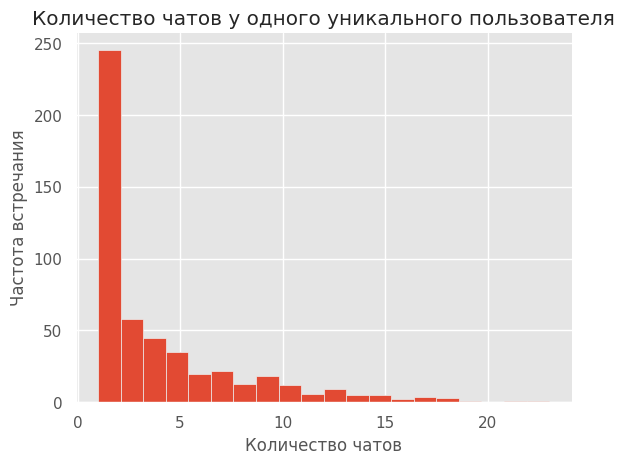

In [ ]:
# @title events_count
plt.style.use('ggplot')
clients['events_count'][clients['events_count'] <= 23].plot(kind='hist', bins=20)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Количество чатов у одного уникального пользователя')
plt.xlabel('Количество чатов')
plt.ylabel('Частота встречания')

In [ ]:
messages = df\
      .groupby(['chat_id', 'client_id'])[['from', 'text', 'type', 'created_date']]\
      .apply(lambda x: x)\


messages.head(20)

from                              text       type  \
chat_id client_id                                                              
11      11        73603   agent  Здравствуйте! Чем могу помочь? 👋  proactive   
                  73604  client                     Здравствуйте!    message   
21      21        73617  client                     Здравствуйте!    message   
                  73618  client                            qwerty    message   
                  73619  client                                🦄     message   
                  73620   agent                                 🐳    message   
                  73621   agent                               NaN       left   
22      11        73605  client                        ghdghgfhdf    message   
23      22        73613  client                  Мне нужна помощь    message   
                  73614   agent                                13    message   
                  73615  client                                😞     message   
                  73616   agent                               NaN       left   
24      23        73596  client                            /start    message   
                  73597  client                             /stop    message   
                  73598  client                            /start    message   
                  73599  client                            ываыва    message   
                  73600   agent                               NaN       left   
25      24        73608  client                            /start    message   
                  73609  client                            qwerty    message   
                  73610   agent                              asdf    message   

                               created_date  
chat_id client_id                            
11      11        73603 2021-07-08 12:52:49  
                  73604 2021-07-08 12:52:49  
21      21        73617 2021-07-09 07:23:33  
                  73618 2021-07-09 07:24:12  
                  73619 2021-07-09 07:24:39  
                  73620 2021-07-09 09:01:25  
                  73621 2021-07-09 09:35:21  
22      11        73605 2021-07-09 07:23:51  
23      22        73613 2021-07-12 07:22:05  
                  73614 2021-07-12 07:23:44  
                  73615 2021-07-12 07:24:22  
                  73616 2021-07-12 07:33:27  
24      23        73596 2021-07-12 07:40:14  
                  73597 2021-07-12 07:40:32  
                  73598 2021-07-12 13:44:24  
                  73599 2021-07-12 13:44:26  
                  73600 2021-07-12 13:47:57  
25      24        73608 2021-07-12 09:59:34  
                  73609 2021-07-12 09:59:39  
                  73610 2021-07-12 10:00:27

Время ответа оператора (на первое сообщение)

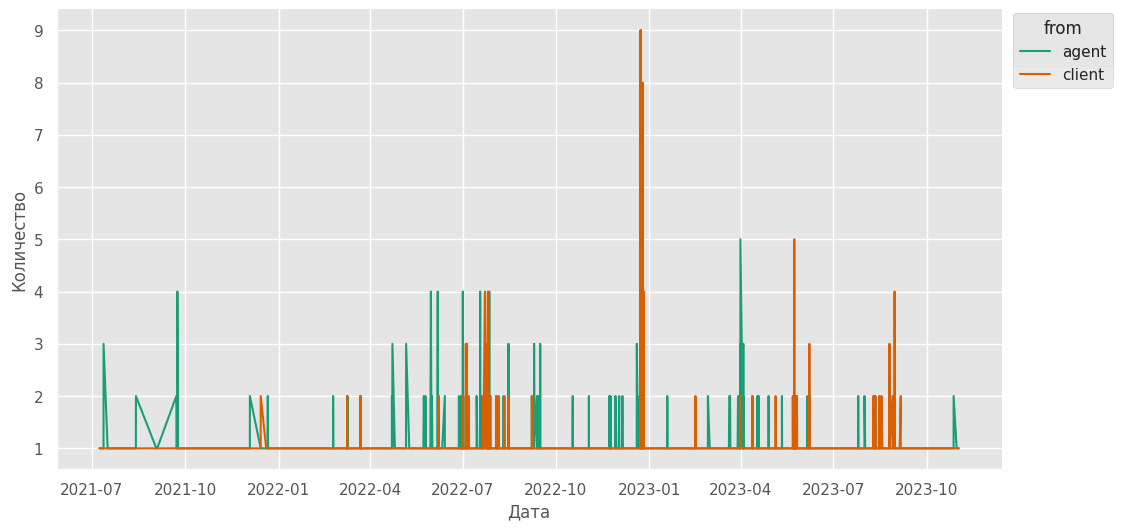

In [ ]:
# @title created_date vs count()

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['created_date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'created_date'}, axis=1)
              .sort_values('created_date', ascending=True))
  xs = counted['created_date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = messages.sort_values('created_date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('from')):
  _plot_series(series, series_name, i)
  fig.legend(title='from', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Дата')
_ = plt.ylabel('Количество')

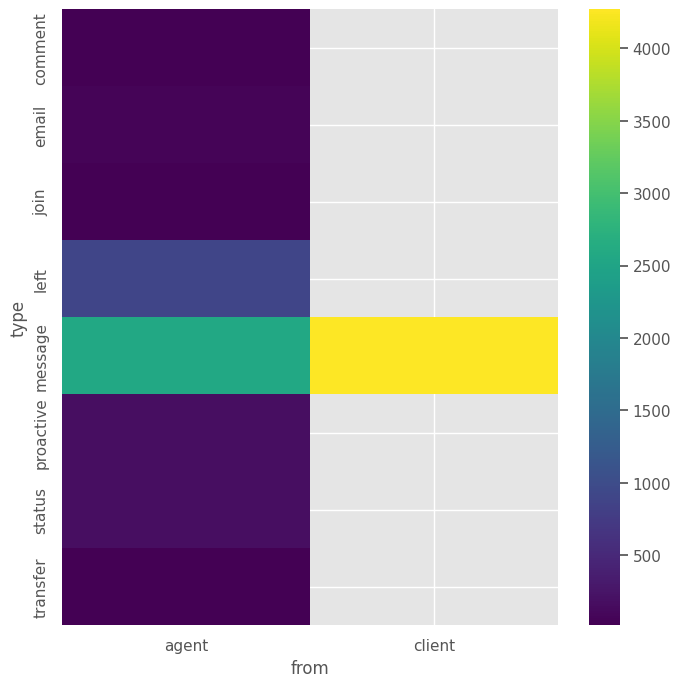

In [ ]:
# @title from vs type

plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['type'].value_counts()
    for x_label, grp in messages.groupby('from')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('from')
_ = plt.ylabel('type')

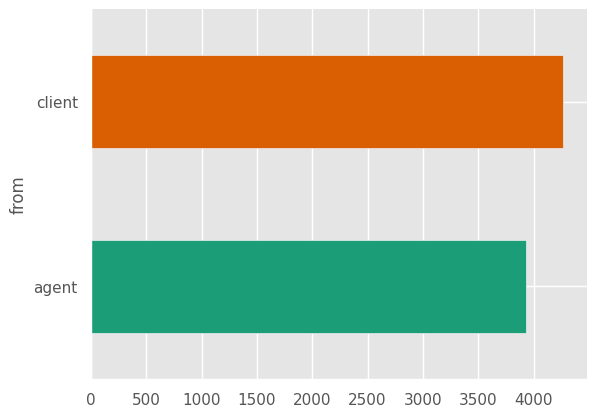

In [ ]:
# @title from

messages.groupby('from').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
chats = df.groupby('chat_id').agg(
        chat_type = ('chat_type', lambda x: x.unique()[0]),
        messages_count = ('text', 'count'),
        start = ('created_date', lambda x: x.min()),
        finish = ('created_date', lambda x: x.max()),
        last_message_type	= ('chat.last_message.type', lambda x: x.unique()[0]),
        last_message_from = ('chat.last_message.from', lambda x: x.unique()[0]),
        last_message_text = ('chat.last_message.text', lambda x: x.unique()[0]),

        # proactive_message = ('chat.proactive_message.text', lambda)

)



In [ ]:
chats['hour'] = chats['start'].dt.hour
# chats['date'] = chats['start'].dt.date
chats['weekday'] = chats['start'].dt.dayofweek
chats['month'] = chats['start'].dt.month




In [ ]:
chats['chat_type'] = chats['chat_type'].astype('category')
chats['last_message_type'] = chats['last_message_type'].astype('category')
chats['last_message_from'] = chats['last_message_from'].astype('category')
#chats['weekday'] = chats['weekday'].astype('category')
#chats['month'] = chats['month'].astype('category')
#chats['date'] = chats['date'].astype('datetime64[ns]')


chats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 882 entries, 11 to 1096
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   chat_type          882 non-null    category      
 1   messages_count     882 non-null    int64         
 2   start              882 non-null    datetime64[ns]
 3   finish             882 non-null    datetime64[ns]
 4   last_message_type  882 non-null    category      
 5   last_message_from  882 non-null    category      
 6   last_message_text  882 non-null    object        
 7   hour               882 non-null    int32         
 8   weekday            882 non-null    int32         
 9   month              882 non-null    int32         
dtypes: category(3), datetime64[ns](2), int32(3), int64(1), object(1)
memory usage: 47.8+ KB


In [ ]:
# Расчет длительности каждого чата
chats['duration'] = chats['finish'] - chats['start']

# Расчет медианы длительности чата
median_chat_duration = chats['duration'].median()
# Расчет средней длительности чата
average_chat_duration = chats['duration'].mean()

print("Медианное время длительности чата:", median_chat_duration)
print("Среднее время длительности чата:", average_chat_duration.round('1s'))

Медианное время длительности чата: 0 days 01:17:40
Среднее время длительности чата: 0 days 05:11:03


In [ ]:
chats.drop(chats.head(15).index, inplace=True)

In [ ]:
chats.head()

,chat_type,messages_count,start,finish,last_message_type,last_message_from,last_message_text,hour,weekday,month,duration
chat_id,,,,,,,,,,,
46,incoming,7,2021-07-22 14:07:03,2021-07-23 03:22:12,message,client,благодарю!,14,3,7,0 days 13:15:09
47,incoming,2,2021-07-27 07:48:29,2021-07-27 09:50:21,message,agent,Добрый день! ),7,1,7,0 days 02:01:52
48,missed,2,2021-07-27 12:35:59,2021-07-27 19:50:39,message,client,👩‍🦽👩‍🦽👩‍🦽👩‍🦽,12,1,7,0 days 07:14:40
49,missed,5,2021-07-28 07:25:04,2021-07-28 07:57:38,message,client,fffffffffffffffff,7,2,7,0 days 00:32:34
50,missed,3,2021-07-28 07:30:36,2021-07-28 07:57:40,message,client,😕,7,2,7,0 days 00:27:04


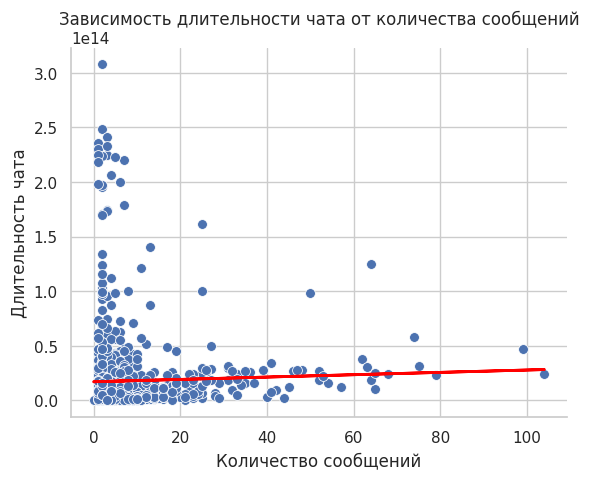

In [ ]:
# Построение scatter plot
sns.set(style="whitegrid")
sns.scatterplot(x='messages_count', y='duration', data=chats, s=50)

# Выполнение регрессии
x = sm.add_constant(chats['messages_count'])
y = chats['duration']
model = sm.OLS(y, x)
results = model.fit()

# Построение линии регрессии
plt.plot(chats['messages_count'], results.predict(x), color='red', linewidth=2)

# Убрать верхнюю и правую границы графика
plt.gca().spines[['top', 'right']].set_visible(False)

# Поменять направление оси y
plt.gca().invert_yaxis()

# Настройка заголовка и подписей осей
plt.title('Зависимость длительности чата от количества сообщений')
plt.xlabel('Количество сообщений')
plt.ylabel('Длительность чата')

# Отображение графика
plt.show()

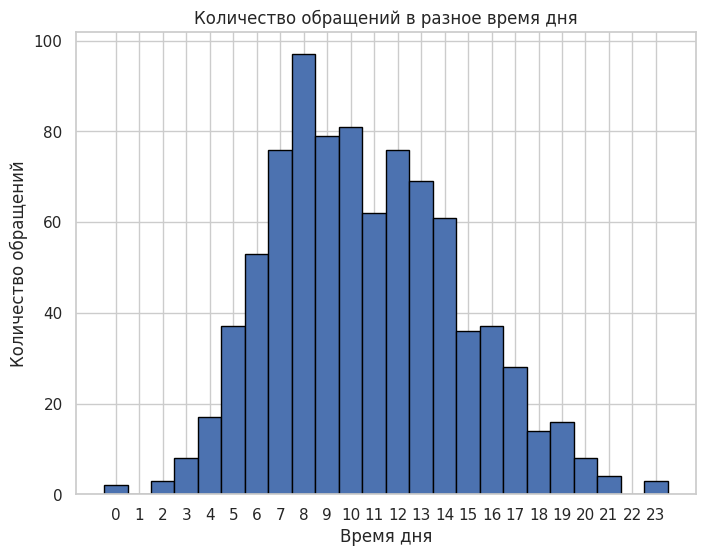

In [ ]:
plt.figure(figsize=(8, 6))

# Получение уникальных значений времени дня
unique_hours = chats['hour'].unique()

# Определение интервалов для бинов
bins = np.arange(min(unique_hours), max(unique_hours) + 1.5, 1) - 0.5

# Построение гистограммы с указанными бинами
chats['hour'].plot(kind='hist', bins=bins, edgecolor='black')

# Настройка заголовка и подписей осей
plt.title('Количество обращений в разное время дня')
plt.xlabel('Время дня')
plt.ylabel('Количество обращений')

# Формирование меток оси x
plt.xticks(range(24))

# Отображение графика
plt.show()

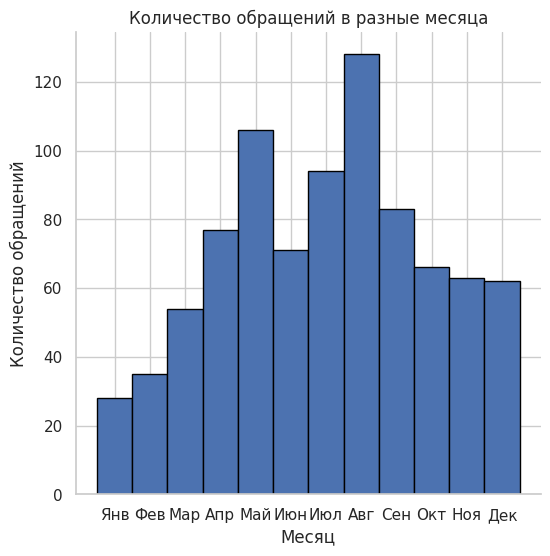

In [ ]:
# @title month

plt.figure(figsize=(6, 6))
# Получение уникальных значений времени дня
unique_month = chats['month'].unique()

# Определение интервалов для бинов
bins = np.arange(min(unique_month), max(unique_month) + 1.5, 1) - 0.5

# Построение гистограммы с указанными бинами
chats['month'].plot(kind='hist', bins=bins, edgecolor='black')

# Настройка заголовка и подписей осей
plt.title('Количество обращений в разные месяца')
plt.xlabel('Месяц')
plt.ylabel('Количество обращений')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Формирование меток оси x
plt.xticks(range(1, 13), ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'])

# Отображение графика
plt.show()



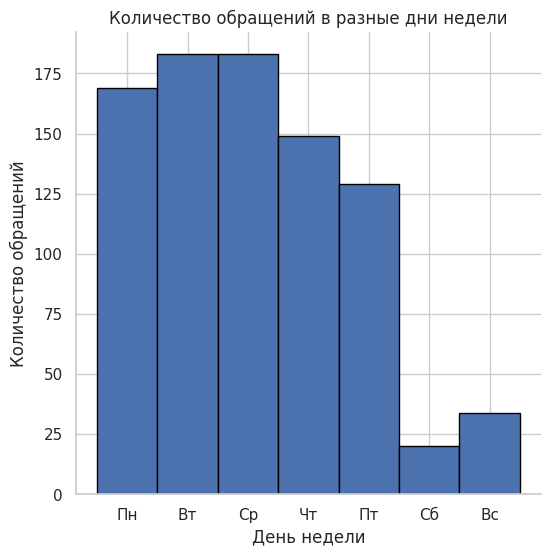

In [ ]:
# @title weekday

plt.figure(figsize=(6, 6))
# Получение уникальных значений времени дня
unique_month = chats['weekday'].unique()

# Определение интервалов для бинов
bins = np.arange(min(unique_month), max(unique_month) + 1.5, 1) - 0.5

# Построение гистограммы с указанными бинами
chats['weekday'].plot(kind='hist', bins=bins, edgecolor='black')

# Настройка заголовка и подписей осей
plt.title('Количество обращений в разные дни недели')
plt.xlabel('День недели')
plt.ylabel('Количество обращений')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Формирование меток оси x
plt.xticks(range(0, 7), ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])

# Отображение графика
plt.show()


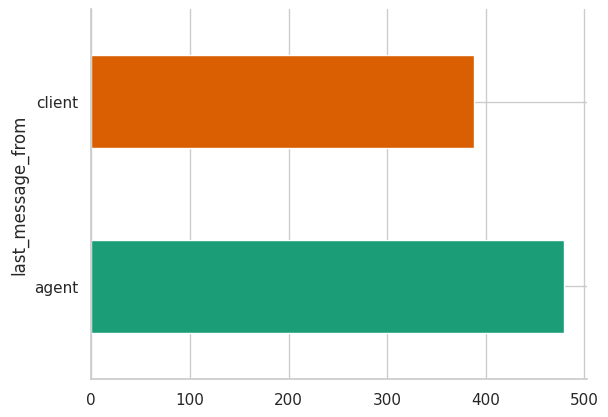

In [ ]:
# @title last_message_from


chats.groupby('last_message_from').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

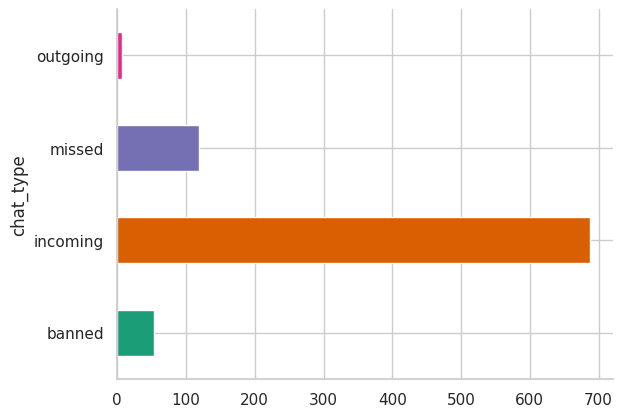

In [ ]:
# @title chat_type

chats.groupby('chat_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
chats.describe()

,messages_count,start,finish,hour,weekday,month,duration
count,867.000000,867,867,867.000000,867.000000,867.000000,867
mean,8.126874,2022-12-29 13:05:01.004613632,2022-12-29 18:04:33.122260736,10.671280,2.094579,6.978085,0 days 04:59:32.117647058
min,0.000000,2021-07-22 14:07:03,2021-07-23 03:22:12,0.000000,0.000000,1.000000,0 days 00:00:00
25%,2.000000,2022-08-03 09:08:06,2022-08-03 09:39:43,8.000000,1.000000,5.000000,0 days 00:20:39
50%,4.000000,2022-12-24 04:50:58,2022-12-25 15:29:33,10.000000,2.000000,7.000000,0 days 01:15:17
75%,9.000000,2023-06-01 08:45:39.500000,2023-06-01 14:11:01.500000,13.000000,3.000000,9.000000,0 days 04:58:35.500000
max,104.000000,2023-11-01 12:14:29,2023-11-01 12:17:00,23.000000,6.000000,12.000000,3 days 13:25:44
std,11.619350,NaN,NaN,3.945254,1.608380,2.951999,0 days 10:36:15.334955721


In [ ]:
chats['chat_type'].value_counts()

chat_type
incoming    687
missed      119
banned       54
outgoing      7
Name: count, dtype: int64

In [ ]:
chats['chat_type'].value_counts(normalize=True)

chat_type
incoming    0.792388
missed      0.137255
banned      0.062284
outgoing    0.008074
Name: proportion, dtype: float64

In [ ]:
# Сгруппируем данные по дням и посчитаем количество чатов для каждого дня
chats_per_day = chats.groupby(chats['start'].dt.date).size()

chats_per_day.describe()

count    386.000000
mean       2.246114
std        1.735511
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       13.000000
dtype: float64

In [ ]:
# День, когда поступило наибольшее количество запросов
chats_per_day.idxmax()

datetime.date(2023, 8, 10)

In [ ]:
df.to_csv('/content/drive/MyDrive/МФТИ/ВКРС/data/data.csv', index = False)
chats.to_csv('/content/drive/MyDrive/МФТИ/ВКРС/data/chats.csv', index = False)
messages.to_csv('/content/drive/MyDrive/МФТИ/ВКРС/data/messages.csv', index = False)
clients.to_csv('/content/drive/MyDrive/МФТИ/ВКРС/data/clients.csv', index = False)

In [12]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('EDA.ipynb', notebookpath="/content/drive/MyDrive/МФТИ/ВКРС/ноутбуки")

File ‘colab_pdf.py’ already there; not retrieving.





E: Unable to locate package texlive-generic-recommended
[NbConvertApp] WARNING | pattern '$notebookpath$file_name' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y

'File Download Unsuccessful. Saved in Google Drive'